# "Tears of Joy": Analysis of Emotionally Charged Text through Natural Language Processing Techniques



### Lyzer Merck Bautista
### Keno Roberto Frianeza

## Introduction

It is no surprise that with the advent of technology and the rise of the Internet came the usage of a standard medium that has served as a reliable means of communication among electronic devices: text. Text is a computer’s working language, each symbol used for various purposes such as programming, documentation, etc. A useful characteristic of text is that each of its symbols can be easily distinguished, which helps in interpreting its letters, words, phrases, and sentences as artifacts that can be processed through machine learning algorithms. This opens up a multitude of possibilities in comprehending the text and deriving its implications that could help solve various real-world problems once these algorithms are deployed.

A useful feature of human intuition is the ability to discern/assume emotion that is evoked in a token of written text. Through subconsciously noting nuances in the token (sentence structure, keywords, context, etc.), humans can usually estimate the sentiment that the writer of the token is giving. This remarkable feat that is uniquely ours is something that we hope to replicate through machine learning. Given pieces of written text, for instance the sentence “She was terror-stricken”, we aim to apply a machine learning algorithm that assesses these pieces and categorizes them into specific emotions that they most likely elicit, such as “happiness”, “sadness”, “surprise”, etc. and in the case above the emotion would be “fear”.

We decided to choose this as our project to work on because we wanted to learn more about natural language processing (NLP) and we decided to use this dataset as it is both interesting and challenging. We also see its potential relevance in real-world applications because tagging emotions to text artifacts can be useful in situations like parsing email, customer product reviews, and other events where emotional content plays a significant role.


## Methodology

The primary library we use for our data analysis and manipulation is **pandas**, a powerful open source library for our purposes.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


The dataset that we are going to use is called Emotions in Text. It has 2 fields - Text and Classification. The text field contains the sentences that are either to be trained or tested. On the other hand, the Classification field has 6 possible values representing 6 emotions. The different emotions vary from anger, fear, happy, love, sadness, and surprise. The dataset contains 21459 entries and its format is comma-separated-values(csv).

In [2]:
############# START OF EMOTION TEXT CLASSIFIER ##############

In [3]:
###### FETCH DATA #####
path = 'Emotion_final.csv'
messages = pd.read_csv(path)
print(messages.shape)
messages

(21459, 2)


Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
21454               Melissa stared at her friend in dism     fear
21455  Successive state elections have seen the gover...     fear
21456               Vincent was irritated but not dismay     fear
21457  Kendall-Hume turned back to face the dismayed ...     fear
21458                    I am dismayed , but not surpris     fear

[21459 rows x 2 columns]

Seen above is the dataframe of the dataset's csv file. The numbers on the left side indicate the ith sentence of the dataset, from 0 to 21458. The following column shows the text contents and the third column shows the tagged emotion per sentence. For our purposes, the first half of the dataset will be treated as training data, while the second half of the dataset will be our testing data.

In [4]:
##### CLEAN DATA #####
import re #use regex
messages.dropna(inplace=True) # drop null values

for i in range(0, len(messages)):
    messages['Text'][i] = messages['Text'][i].lower()
    messages['Text'][i] = re.sub(r'@[A-Za-z0-9]+', '', messages['Text'][i]) # remove @mentions 
    messages['Text'][i] = re.sub(r'#', '', messages['Text'][i])# remove # tag
    messages['Text'][i] = re.sub(r'RT[\s]+', '', messages['Text'][i]) # remove the RT
    messages['Text'][i] = re.sub(r'https?:\/\/\S+', '', messages['Text'][i]) # remove links
    messages['Text'][i] = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', messages['Text'][i]) # remove unicode characters
    messages['Text'][i] = re.sub(r'"', '', messages['Text'][i]) #remove "
    messages['Text'][i] = re.sub(r':', '', messages['Text'][i]) #remove :

messages

Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
21454               melissa stared at her friend in dism     fear
21455  successive state elections have seen the gover...     fear
21456               vincent was irritated but not dismay     fear
21457  kendall-hume turned back to face the dismayed ...     fear
21458                    i am dismayed , but not surpris     fear

[21459 rows x 2 columns]

The purpose of the code above is to remove any discrepancies/noise from the text contents, such as irregular spaces, unnecessary characters such as unicode, hash symbols, at signs, colons, and more. This is done to possibly increase the accuracy with which the sentences are categorized.

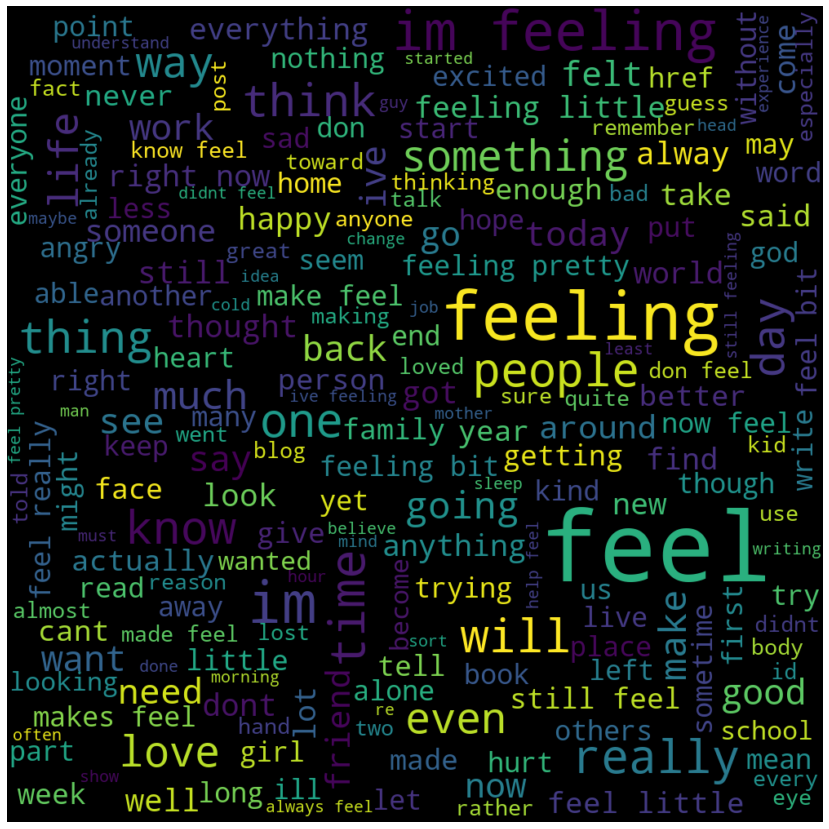

In [5]:
##### CHECK THE MOST COMMON WORDS #####
#install wordcloud by typing "conda install -c conda-forge wordcloud=1.6.0" in anaconda terminal
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words= ' '.join([text for text in messages['Text']])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud of Most Common Words

The word cloud above shows the most common words/tokens that pop up in the sentences from the dataset. The font sizes indicate the frequency of the word: the bigger the size, the more frequent it appears. Notice that articles (a, an, the), prepositions (to, for, on, in, etc.) and other auxiliary words are omitted from the analysis. The set of tokens consists of nouns, pronouns, adjectives, verbs, and adverbs which serve as key features when categorizing the emotions.

At a glance, we see that the most common words are not necessarily indicative of an emotion. Judging by their sizes, words such as *feel*, *feeling*, *people*, and *something* are words that frequently appear as part of sentences in the dataset but judging from their definitions, they do not point to a particular emotion category. These words appear frequently in many of the sentences, regardless of the tagged emotion. Thus, features like these should not be a significant factor in determining the correct emotion, i.e. their feature weights are low.

Looking further, we see that some of the smaller words indicate/imply an emotion, such as the words *love*, *angry*, *excited*, and *hurt*. These tokens aren't as frequent as the abovementioned words, but they are key features in determining what category their sentences are placed in. These words are, more often than not, tied to very specific emotions and thus their feature weights are skewed substantially towards these emotions. 

In [6]:
#get all texts for each category and make a plot
anger = []
fear = [] 
happy = []
love= []
sadness = [] 
surprise = []

for i in range(len(messages)):
    if messages['Emotion'][i] == 'anger':
        anger.append(messages['Text'][i])
    if messages['Emotion'][i] == 'fear':
        fear.append(messages['Text'][i])
    if messages['Emotion'][i] == 'happy':
        happy.append(messages['Text'][i])
    if messages['Emotion'][i] == 'love':
        love.append(messages['Text'][i])
    if messages['Emotion'][i] == 'sadness':
        sadness.append(messages['Text'][i])
    if messages['Emotion'][i] == 'surprise':
        surprise.append(messages['Text'][i])


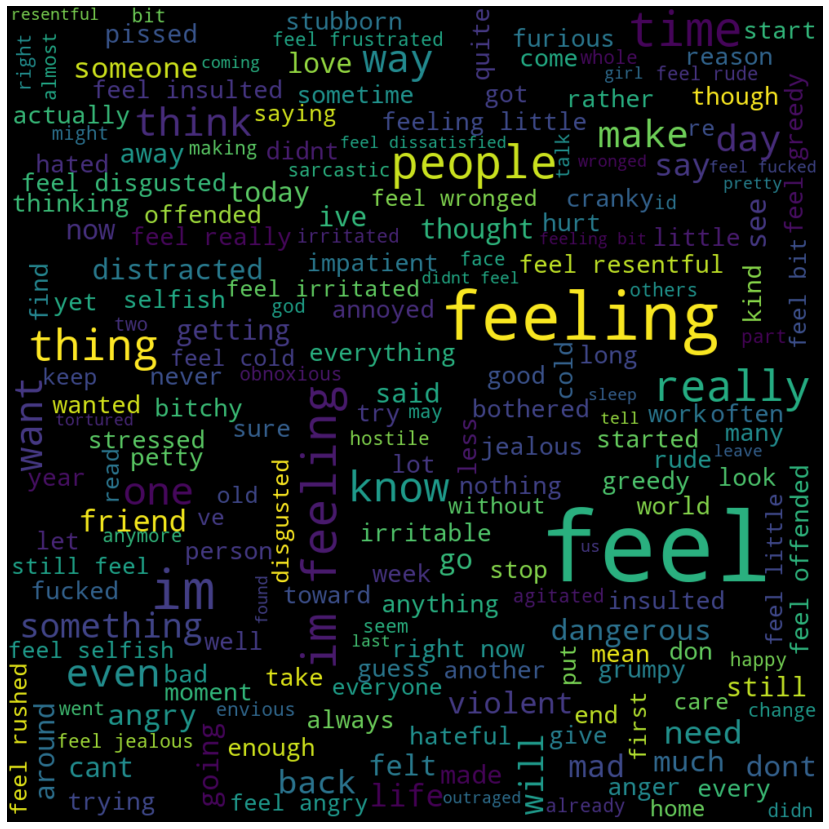

In [7]:
#WORD CLOUD FOR ANGER
words= ' '.join([text for text in anger])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

### Anger Word Cloud

The word cloud above is evidently composed of many words that a human would identify as being associated with anger. Aside from the commonly used neutral words (which will be regular occurrences in the succeeding word clouds), many of the words above indicate anger through synonyms, similes, implications, and other associated feelings and emotions. These words are *angry*, *anger*, *hateful*, *violent*, *grumpy*, *selfish*, *cranky*, etc. and some expletives associated with the emotion can also be seen. Some of the words do not indicate anger but still are part of the word cloud because they often appear in tandem / in conjunction with the words that do imply anger, like the word *feel* which is commonly used to precede an emotion.

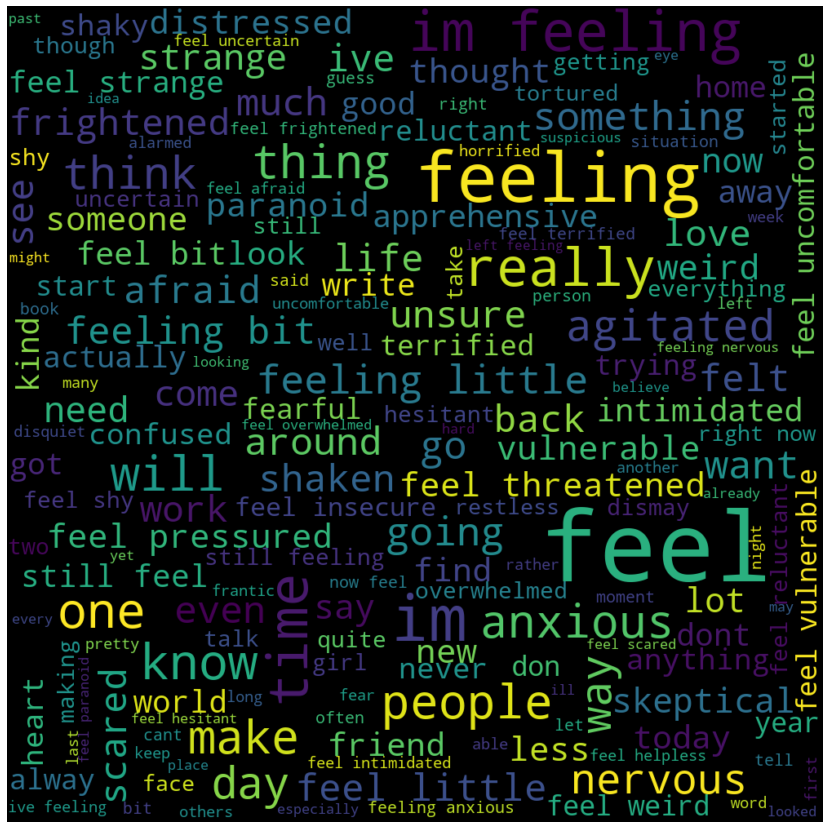

In [8]:
#WORD CLOUD FOR FEAR
words= ' '.join([text for text in fear])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

### Fear Word Cloud

The fear word cloud is interesting because it features most words that clearly denote fear in its varying degrees, from less intense ones like *uncertain*, *reluctant*, *unsure*, to those more on the extreme side like *tortured*, *horrified*, *distressed*, and *frightened*. An interesting side note is that it can be argued that certain words can also pass off as conveying surprise (like *frightened* and *shaken*) depending on the context, as well as sadness (like *vulnerable*, *shy*, and *insecure*). Nevertheless, most of the words do imply fear and the most frequent occurrences are once again words like *feel* and *feeling*.

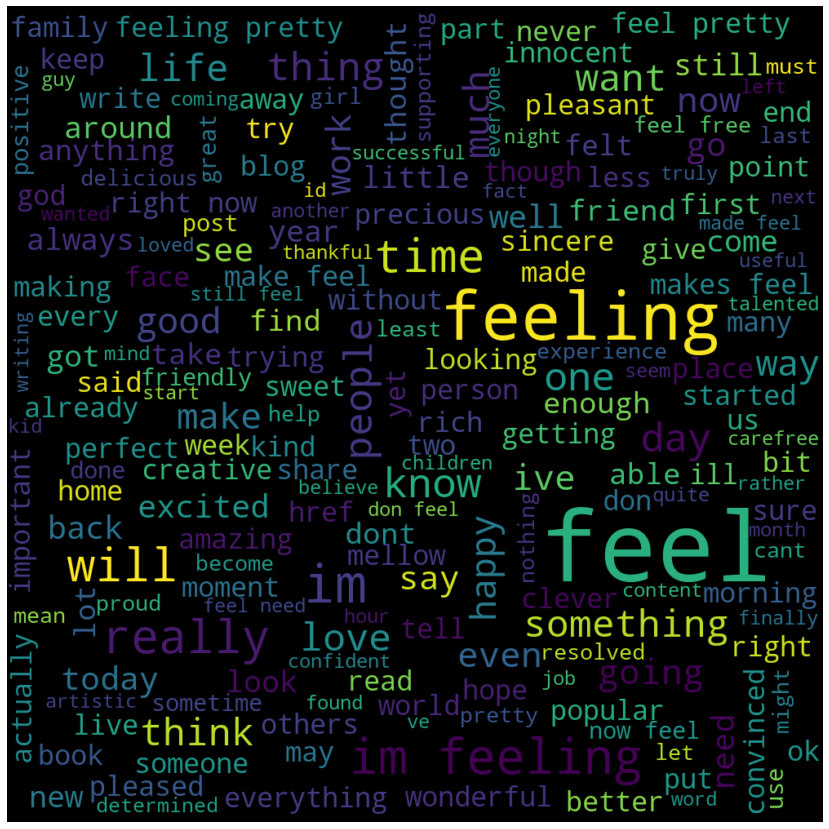

In [9]:
#WORD CLOUD FOR HAPPY
words= ' '.join([text for text in happy])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

### Happy Word Cloud

In the happy word cloud, the words here mostly imply happiness, and some words can also become part of the love category as the are closely related. Happy words like *pleasant*, *pleased*, *confident*, *hopeful*, and *successful* are found throughout the cloud. Notice that the words *life* and *time* are regular occurrences in happy sentences. This is because they follow some of the happy words, i.e. creating phrases like *pleasant time* and *good life*. Some words that can be classified as love are *love*, *supporting*, *delicious*, and *popular*.

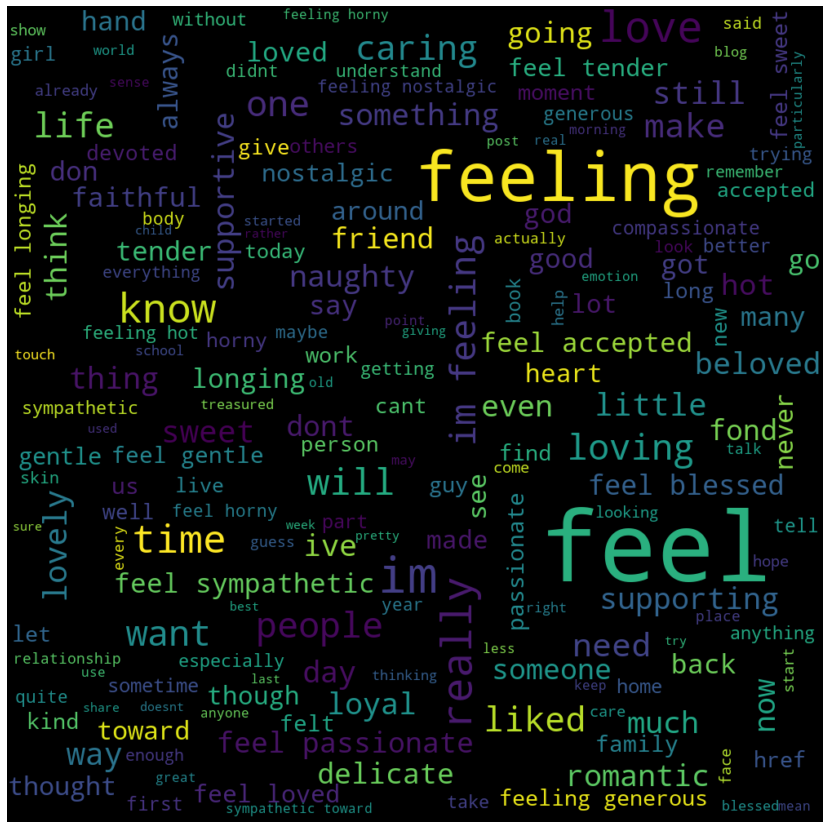

In [10]:
#WORD CLOUD FOR LOVE
words= ' '.join([text for text in love])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

### Love Word Cloud

In the love word cloud, as mentioned previously happy words and love words are closely related so they can represent an overlap. Love words in the cloud are *loved*, *romantic*, *sweet*, *tender*, etc. and some words that can be construed as happy are *accepted*, *blessed*, *kind*, and *generous*. Love words are usually associated with words of intimacy, passion, and commitment.

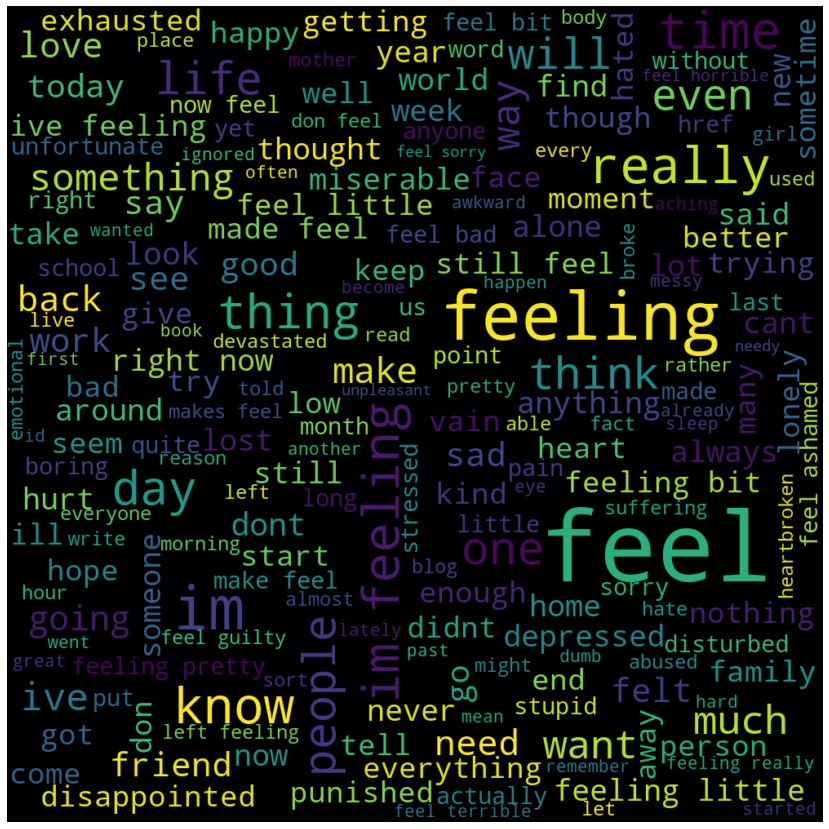

In [11]:
#WORD CLOUD FOR SADNESS
words= ' '.join([text for text in sadness])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

### Sadness Word Cloud

The sadness word cloud features words that show sadness in different degrees and in different contexts. Words like *depressed*, *hurt*, *miserable*, *heartbroken*, and *unpleasant* depict the various ways the emotion sadness can manifest in our lives. What is interesting about the words in this cloud are that some of the words can be misconstrued as implying something other than sadness such as fear, with words like *disturbed*, *abused*, and *punished* that can be said as fearful.

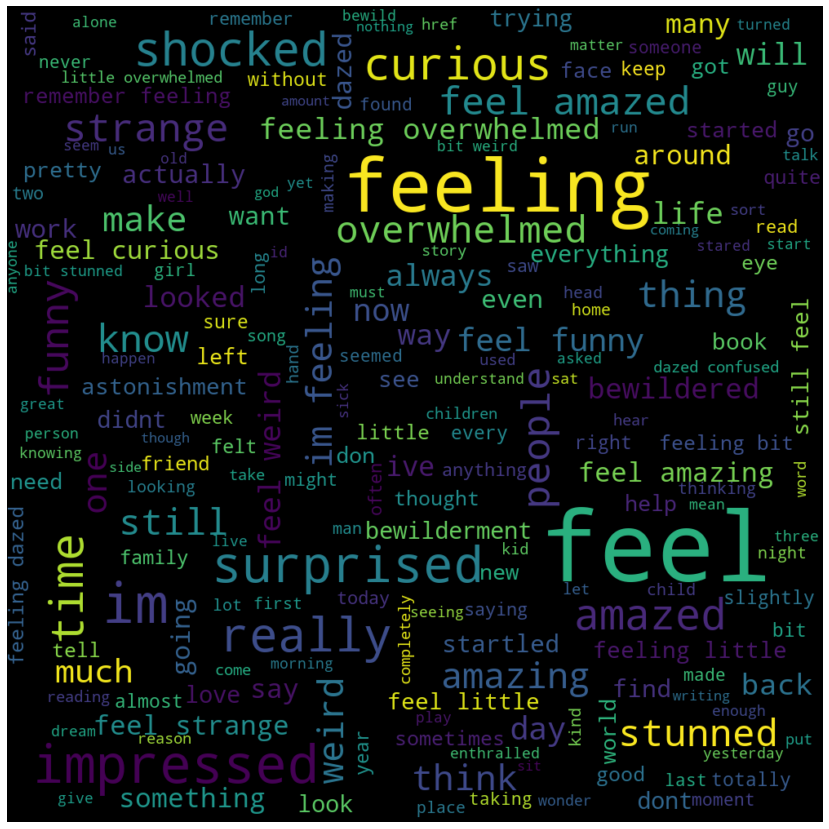

In [12]:
#WORD CLOUD FOR SURPRISE
words= ' '.join([text for text in surprise])
clude= WordCloud(width=1000, height=1000, random_state= 21,min_font_size=15,max_font_size=119).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

### Surprise Word Cloud

The surprise word cloud exhibits words such as *astonishment*, *bewildered*, and *amazed*. As is the case in other word clouds, some of the words in this cloud can also expresse different emotions depending on context. Fearful words can be *overwhelmed*, *confused*, and *shocked*. Happy words can be *amazed*, *curious*, *feel amazing*, and *enthralled*.

### General Takeaway from the Word Clouds

The commonality of the clouds are that there are words that feature in every word cloud, because these words usually precede or follow the main emotion words. These words include *feel* and *feeling*. In general, the word clouds show that the categorization of words are accurate. Also, depending on context, the emotions of words can overlap.

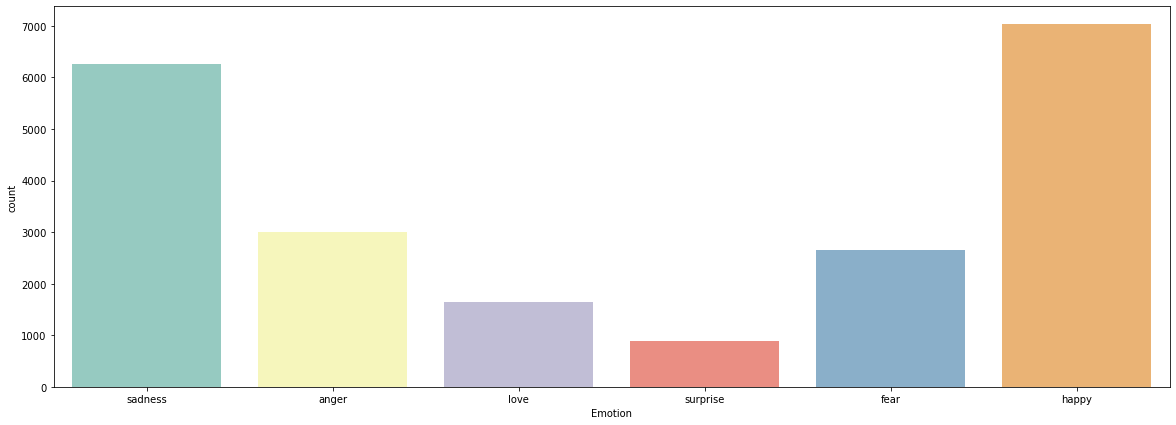

In [13]:
#It is good to show the initial condition of the dataset as it will help the analysis
import seaborn as sns

plt.figure(figsize = (20,7))
#sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Emotion", data=messages, palette="Set3", dodge=False)

### Bar Graph of the Dataset

The graph above shows the word count of each emotion category (sadness, anger, love, surprise, fear, and happy). The happy category has the largest number of words totaling more than 7000, followed by sadness with a bit over 6000, and surprise has the least number of words with around 1000. The large discrepancy between the largest and the smallest category leads to an unbalanced dataset, which has implications on the results to be discussed later on.

#### 1. Instantiating CountVectorizer

We instantiate the CountVectorizer *vect* with the default parameters.

In [14]:
# import and instantiate CountVectorizer (with the default parameters)
# using the variable name vect
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [15]:
messages['Emotion'] = messages.Emotion.map({'anger':0, 'fear':1, 'happy':2, 'love':3, 'sadness':4, 'surprise':5 })
messages

Text  Emotion
0                                i didnt feel humiliated        4
1      i can go from feeling so hopeless to so damned...        4
2       im grabbing a minute to post i feel greedy wrong        0
3      i am ever feeling nostalgic about the fireplac...        3
4                                   i am feeling grouchy        0
...                                                  ...      ...
21454               melissa stared at her friend in dism        1
21455  successive state elections have seen the gover...        1
21456               vincent was irritated but not dismay        1
21457  kendall-hume turned back to face the dismayed ...        1
21458                    i am dismayed , but not surpris        1

[21459 rows x 2 columns]

We map the emotions above to integers, with anger = 0, fear = 1, happy = 2, love = 3, sadness = 4, and surprise = 5.

#### 2. Learning training data and creating a DTM

We map X to the text messages and y to the emotions associated. We create a test split into X_train, X_test, y_train, and y_test, and we fit into *vect* the training data X_train. After, we transform the X_train fit of *vect* to a DTM as well as transform X_test to a DTM, resulting in *X_train_dtm* and *X_test_dtm* respectively.

In [16]:
#split data
X = messages.Text
y = messages.Emotion

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=427)

# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)

CountVectorizer()

In [17]:
tokens = vect.get_feature_names()
print("Number of tokens:",len(tokens))

Number of tokens: 16598


We have 16,598 tokens which are the number of unique words featured in the dataset.

In [18]:
#combine fit and transform into a single step using the fit_transform method
X_train_dtm = vect.fit_transform(X_train)

# transform testing data, too, into a document-term matrix
X_test_dtm = vect.transform(X_test)

#### 3. Implementing Multinomial Naive Bayes

Using scikit-learn, we import the Naive Bayes model and instantiate it as *nb*. We train *nb* using the previously constructed X_train_dtm and y_train, then create a class prediction for the testing data X_test_dtm through *nb.predict()* then we show the accuracy of the class prediction by comparing it to y_test.

In [19]:
# import and instantiate a Multinomial Naive Bayes model
# use the nb variable
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# train the model using X_train_dtm and the fit() method
nb.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm using the predict() function
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7401677539608574

The accuracy score is 0.7401677539608574, which means that roughly 74% of the text sentences are correctly categorized. Given our baseline accuracy of roughly 74%, we can start optimizing certain aspects/parameters of our model so we can increase this accuracy score.

In [20]:
feel = 0
happy = 0
for text in messages['Text']:
    for word in text.split():
        if word == "feel":
            feel += 1
        if word == "happy":
            happy += 1

feel, happy

(13973, 338)

The output above shows quantitatively what we've observed from the word clouds previously, in that some neutral words outnumber emotion words, such as *feel* occurring 13,973 times while the word *happy* appears 338 times.

#### 4. Tweaking the max_df parameter

With this large difference between the occurrences of terms, we can mitigate such a discrepancy by employing a *max_df* parameter in our CountVectorizer. What max_df does is it ignores terms that appear in a specified number of documents. Using different values of max_df (for example, max_df = 320 means ignore terms that appear 320 times, and max_df = 0.4 means ignore terms that appear in 40% of documents), we can determine the best parameter for max_df to obtain the highest accuracy possible.

In [21]:
#Thus, it is reasonable to tweak the max_df of the count vectorizer

print("Original number of tokens: 16598", end='\n\n')

possible_max_df = [320, 640, 1280, 0.4, 0.7]

data_max_df = []

for p_max_df in possible_max_df:
    vect = CountVectorizer(max_df=p_max_df)
    #fitting learning data to vect, creating DTMs from X_train and X_test
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    #tokens is an array of unique features
    tokens = vect.get_feature_names()
    
    #declare Naive Bayes model nb
    nb = MultinomialNB()
    #fit x_train_dtm to y_train
    nb.fit(X_train_dtm, y_train)
    #build class prediction
    y_pred_class = nb.predict(X_test_dtm)
    #compare y_pred_class to y_test
    data_max_df.append([p_max_df, len(tokens), metrics.accuracy_score(y_test, y_pred_class)])

pd.DataFrame(data_max_df, columns=['max_df used', 'Number of Tokens', 'Accuracy'])

Original number of tokens: 16598



max_df used  Number of Tokens  Accuracy
0        320.0             16485  0.791426
1        640.0             16542  0.777819
2       1280.0             16568  0.768500
3          0.4             16596  0.745014
4          0.7             16598  0.740168

Looking at the dataframe above, we see that the accuracy scores can vary greatly depending on what max_df value is used. Sorted by decreasing accuracy score, we can see that max_df = 320 led to the highest accuracy score with a score of 0.791426. This is a very significant increase from the baseline accuracy of  0.74017 obtained from default parameters. Setting max_df to 320 means to ignore terms that appear 320 times, so words like *feel* and *feeling* which are vastly ahead in occurrences are ignored in the analysis of the Naive Bayes model. Looking at the succeeding max_df values of 640, 1280, 0.4 (or 40% of documents), and 0.7 (70% of documents), we see that the accuracy goes down in percentage points from 0.77 to 0.74. As such, the max_df to use should not be too high nor too low but just enough to omit the unnecessary terms while keeping the important ones. Thus, setting max_df to 320 is ideal for the dataset.

#### 5. Introducing stop words

The stop_words parameter in CountVectorizer is used to remove words (in English) that are common in sentences and whose usage is for grammatical and syntactic purposes, such as the articles *a*, *an*, and *the*, as well as prepositions, auxiliary verbs, and the like. The stop_words parameter can be utilized to reduce the unnecessary tokens in the analysis, thereby possibly increasing our accuracy score because the analysis is focused on more pertinent terms like the emotion words themselves.

In [22]:
#Another modification is to remove english words that are too common and do not express emotions
#such as "is", "a', etc using stop_words

import nltk
#nltk.download('stopwords') #make sure to comment after first run
from nltk.corpus import stopwords

#instantiating CountVectorizer with English stop_words, teaching vect with X_train and creating DTMs
vect = CountVectorizer(max_df=320, stop_words=stopwords.words('english'))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

tokens = vect.get_feature_names()
print(len(tokens))

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_class)

16420


0.7968313140726934

Comparing the number of tokens after implementing stop words, we get 16420 unique terms from the 16598 we originally had. After processing the data using the Naive Bayes model, we get an increased accuracy score of 0.796831, noticeably up from 0.791426. The improvement is not as drastic as the implementation of max_df, but it is nonetheless a welcome optimization as every little increase counts especially in large datasets.

#### 6. Increasing training set size

The dataset we are using is relatively small compared to other more comprehensive datasets. Thus, to increase accuracy, we can increase the training set size from the dataset, in turn decreasing the test set size. In running the train_test_split() function, the default size of the train set is 0.65 or 65% of the dataset, and the remaining 35% is the test set.

We manipulate the test_size parameter of train_test_split() to vary its size. We use sizes of 30%, 20%, 10%, and 5% and compare their accuracies.

In [23]:
#The data is limited compared to other datasets. And to have better accuracy, we must have more datasets to train.
#Thus, we can change the ratio of split_test. #default train size is 0.65

possible_test_size = [0.3, 0.2, 0.1, 0.05]
data_test_size = []

for p_test_size in possible_test_size:
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=427, test_size=p_test_size)
    vect = CountVectorizer(max_df=320, stop_words=stopwords.words('english'))
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    X_test_dtm = vect.transform(X_test)


    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    data_test_size.append([p_test_size, metrics.accuracy_score(y_test, y_pred_class)])

pd.DataFrame(data_test_size, columns=['test_size used', 'Accuracy'])

test_size used  Accuracy
0            0.30  0.790618
1            0.20  0.799860
2            0.10  0.805219
3            0.05  0.809879

As seen above, increasing the training test size improved the accuracy of the model by up to 2 percentage points when the training set was 95% of the dataset. In general, giving a larger dataset to train the model will improve accuracy as more words and sentence permutations are learned.

#### 7. Introducing n-grams

In natural language processing, it is normal for words to differ from its common meaning when they are preceded / followed by other words. Words like "tears" and "joy" would signify sadness and happiness respectively, but using them in the phrase "tears of joy" would denote happiness as a result. We thus introduce the use of n-grams to account for these possibilities.


In [25]:
possible_ngram = [(1,1), (1,2), (2,3)]
data_ngram = []

for p_ngram in possible_ngram:
    vect = CountVectorizer(max_df=320, stop_words=stopwords.words('english'), ngram_range=p_ngram)
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    X_test_dtm = vect.transform(X_test)


    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    data_ngram.append([p_ngram, metrics.accuracy_score(y_test, y_pred_class)])

pd.DataFrame(data_ngram, columns=['ngram used', 'Accuracy'])


ngram used  Accuracy
0     (1, 1)  0.809879
1     (1, 2)  0.762349
2     (2, 3)  0.650513

Observing the dataframe above, the use of 2-grams and 3-grams do not increase accuracy and instead decrease it significantly, from 0.8099 down to 0.6505. To preserve the highest accuracy possible, we continue to use only 1-grams (single word tokens). 

#### 8. Tweaking the min_df parameter

The min_df parameter of the CountVectorizer determines the removal of tokens that appear too infrequently in the documents. Setting min_df = X means "ignore terms that appear in less than X documents", so setting it to 1 (its default value) would ignore no terms, and setting it to 10 would ignore terms that appear in less than 10 documents. We determine the best value of min_df to increase the accuracy of the model.

In [26]:
possible_min_df = [1, 5, 10, 0.01]
data_min_df = []

for p_min_df in possible_min_df:
    vect = CountVectorizer(min_df=p_min_df, max_df=320, stop_words=stopwords.words('english'), ngram_range=(1,1))
    vect.fit(X_train)
    X_train_dtm = vect.transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    tokens = vect.get_feature_names()

    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    data_min_df.append([p_min_df, len(tokens), metrics.accuracy_score(y_test, y_pred_class)])

pd.DataFrame(data_min_df, columns=['min_df used', "Number of tokens", 'Accuracy'])

min_df used  Number of tokens  Accuracy
0         1.00             18524  0.809879
1         5.00              4006  0.851817
2        10.00              2333  0.863001
3         0.01                49  0.332712

Looking at the data above, we find that changing the values of min_df has a significant impact on the accuracy of the results. The default value of 1 returns the baseline accuracy 0.8099 that we've optimized so far, and using min_df of 5 and 10, meaning "ignore terms that appear in less than 5 / 10 documents" respectively, return accuracies of 0.8518 and 0.8630. This increases our baseline by a significant 5-6 percentage points, and reduces the number of tokens to less than a quarter of its original size. Setting min_df to 0.01, on the other hand, removes too many tokens and severely impacts the accuracy, reaching a low of 0.3327. 

The reason why tweaking the min_df parameter causes a relatively large jump in accuracy is because min_df removes words that do not appear frequently, resulting to them having unbalanced weights because they have not been processed by the model enough times in the training set to get accurate weights. For instance, the word "downhearted" is a word that appears only 1 time in the training set, and its occurrence was in a "fear" sentence. The model would then tag this word as a "fear" word when in the testing set, it should be considered a "sad" word, and thus the model would get the incorrect result. The min_df parameter mitigates this by removing such words so these unbalanced weights would not count in the calculation of probabilities, increasing the accuracy of the model. It is important, though, to find the ideal min_df value so that not too many or too little tokens are removed from the dataset.

### Summary of Ideal Parameters

For this specific dataset, we have been able to determine the ideal parameter values to set in the CountVectorizer and Naive Bayes model to get the highest possible accuracy. These parameters are:

1. test_size = 0.05 (the percentage size of the testing set, which in this case is 5% of the dataset and 95% is the training set)
2. min_df = 10 (ignore terms that appear in less than 10 documents)
3. max_df = 320 (ignore terms that appear in more than 320 documents)
4. stop_words = english (do not count terms that are considered auxiliary in the English language)
5. ngram_range = (1, 1) (use 1-grams i.e. single word tokens only)

In [27]:
#Thus, the highest accuracy we have obtained is 0.863001 with the following configurations

#COUNT VECTORIZER
#test_size = 0.05

#MULTINOMIAL NAIVE BAYES
#min_df = 10
#max_df = 320
#stop_words = english
#ngram_range = (1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=427, test_size=0.05)
vect = CountVectorizer(min_df=10, max_df=320, stop_words=stopwords.words('english'))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_pred_class)

0.8630009319664492

Our final accuracy for the Naive Bayes classifier is 0.8630 or 86.30%. This is a notable improvement from the standard accuracy of 0.74017 which uses only default parameters.

### Resulting Confusion Matrix

The confusion matrix below shows the matrix of true values (y-axis) compared to their predicted values (x-axis). Recall that the emotions are indexed as follows: anger = 0, fear = 1, happy = 2, love = 3, sadness = 4, and surprise = 5. The matrix's diagonal denote the mode's correct prediction, which reflect the 86% accuracy value as the number of correct predictions vastly outnumber the number of incorrect ones. An interesting thing to note in the matrix is that at the true value = 3 and predicted value = 2, 22 mispredictions (the most of any cell in the matrix) were tallied. This is because the "love" and "happy" emotions, in the English language, are closely related and in many cases are used interchangeably in texts and conversations, and thus the the weights of these words may more or less be equal for both emotions. Also of note is at true value = 5 and predicted value = 5, with 28 correct predictions. This observation stems from the fact that the dataset is extremely unbalanced as the number of "surprise" documents are relatively low.

Text(76.2, 0.5, 'true value')

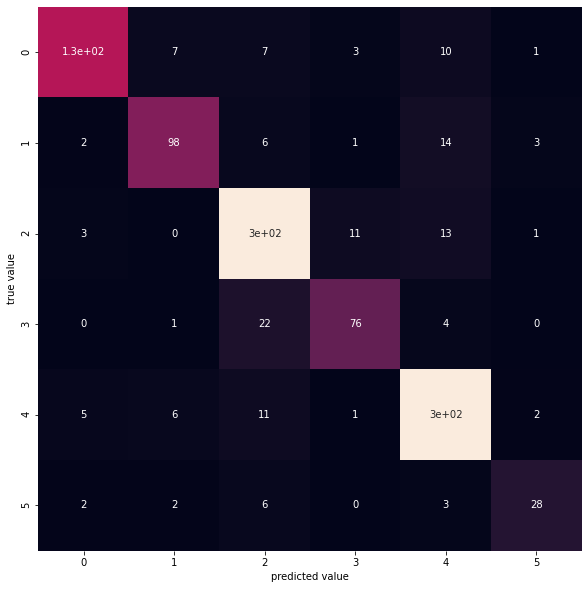

In [28]:
mat = metrics.confusion_matrix(y_test, y_pred_class)

import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
messages['Emotion'] = messages.Emotion.map({'anger':0, 'fear':1, 'happy':2, 'love':3, 'sadness':4, 'surprise':5 })
messages


Text  Emotion
0                                i didnt feel humiliated      NaN
1      i can go from feeling so hopeless to so damned...      NaN
2       im grabbing a minute to post i feel greedy wrong      NaN
3      i am ever feeling nostalgic about the fireplac...      NaN
4                                   i am feeling grouchy      NaN
...                                                  ...      ...
21454               melissa stared at her friend in dism      NaN
21455  successive state elections have seen the gover...      NaN
21456               vincent was irritated but not dismay      NaN
21457  kendall-hume turned back to face the dismayed ...      NaN
21458                    i am dismayed , but not surpris      NaN

[21459 rows x 2 columns]